In [21]:
import pandas as pd

data = pd.read_csv('Sales_Dataset.csv')

data['ds'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y', dayfirst=True)
data['y'] = data['Sales']
data = data[['ds', 'y']]


In [4]:
from prophet import Prophet
model = Prophet()
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqxtzqyz/j3h16f5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqxtzqyz/z1jqxhka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8905', 'data', 'file=/tmp/tmpnqxtzqyz/j3h16f5g.json', 'init=/tmp/tmpnqxtzqyz/z1jqxhka.json', 'output', 'file=/tmp/tmpnqxtzqyz/prophet_model7969d4ie/prophet_model-20240922165928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:59:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
future = model.make_future_dataframe(periods=365)
print(future.tail())

             ds
1590 2019-12-26
1591 2019-12-27
1592 2019-12-28
1593 2019-12-29
1594 2019-12-30


In [23]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


             ds        yhat  yhat_lower   yhat_upper
1590 2019-12-26  243.628125 -583.154472  1070.169581
1591 2019-12-27  197.260998 -573.771603  1050.370822
1592 2019-12-28  210.492756 -537.816825  1040.344279
1593 2019-12-29  196.207471 -598.337323   993.783205
1594 2019-12-30  189.464529 -589.704104   987.864521


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


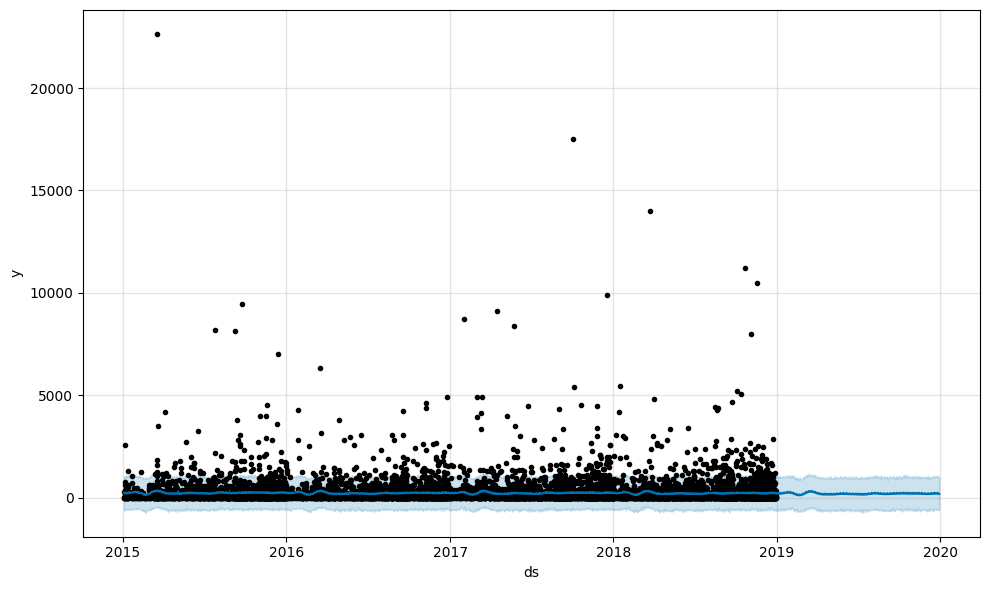

In [24]:
import matplotlib.pyplot as plt
model.plot(forecast)
plt.show()


In [25]:
comparison = pd.merge(data, forecast[['ds', 'yhat']], on='ds', how='left')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(comparison['y'], comparison['yhat'])
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 391624.4818046484


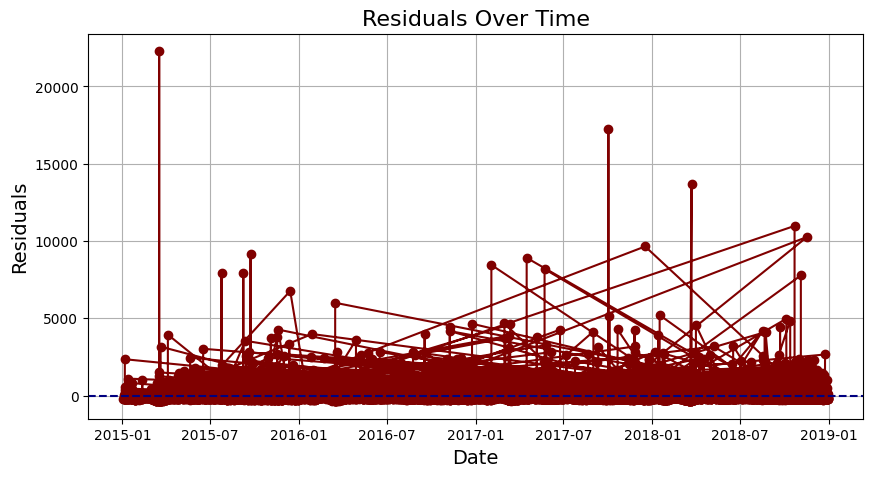

In [26]:
import matplotlib.pyplot as plt
residuals = comparison['y'] - comparison['yhat']
plt.figure(figsize=(10, 5))
plt.plot(comparison['ds'], residuals, marker='o', linestyle='-', color='maroon')
plt.axhline(0, color='navy', linestyle='--')
plt.title('Residuals Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid()

plt.show()


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


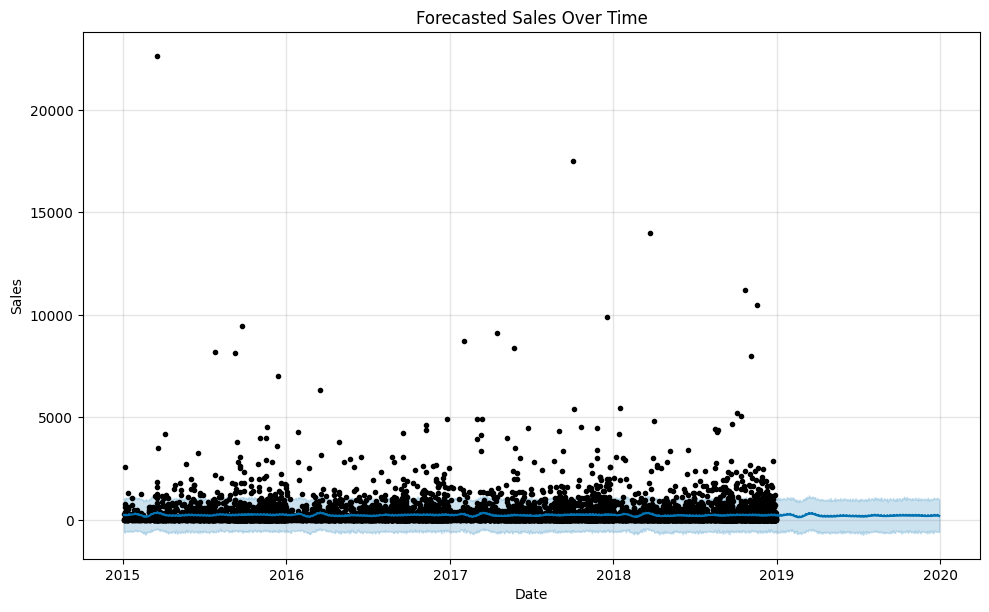

In [27]:
from prophet import Prophet
fig = model.plot(forecast)
plt.title('Forecasted Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


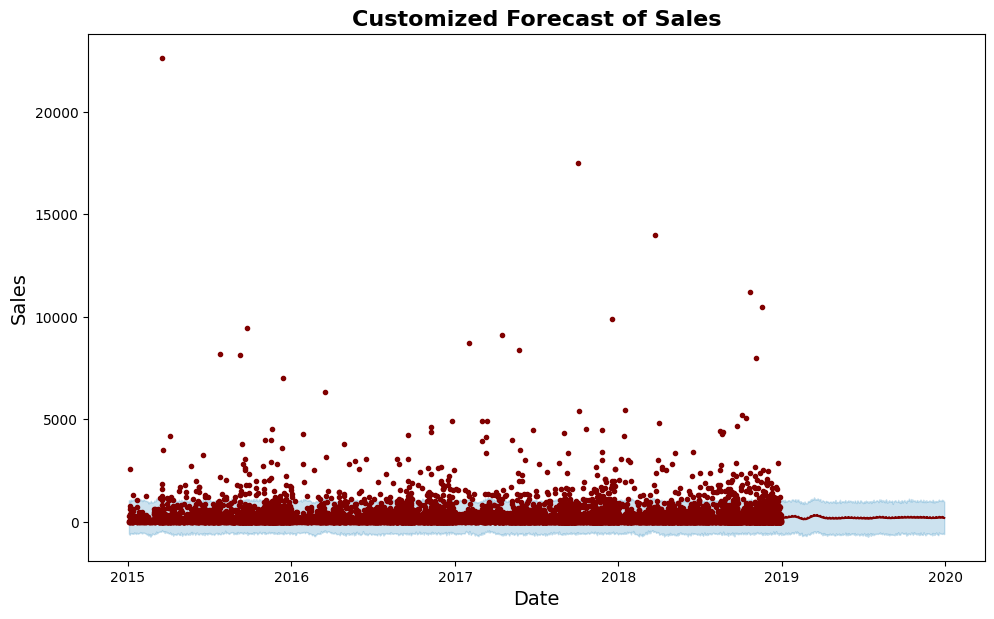

In [28]:
fig = model.plot(forecast)
plt.title('Customized Forecast of Sales', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
for line in fig.gca().get_lines():
    line.set_color('Maroon')
plt.grid()

plt.show()


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

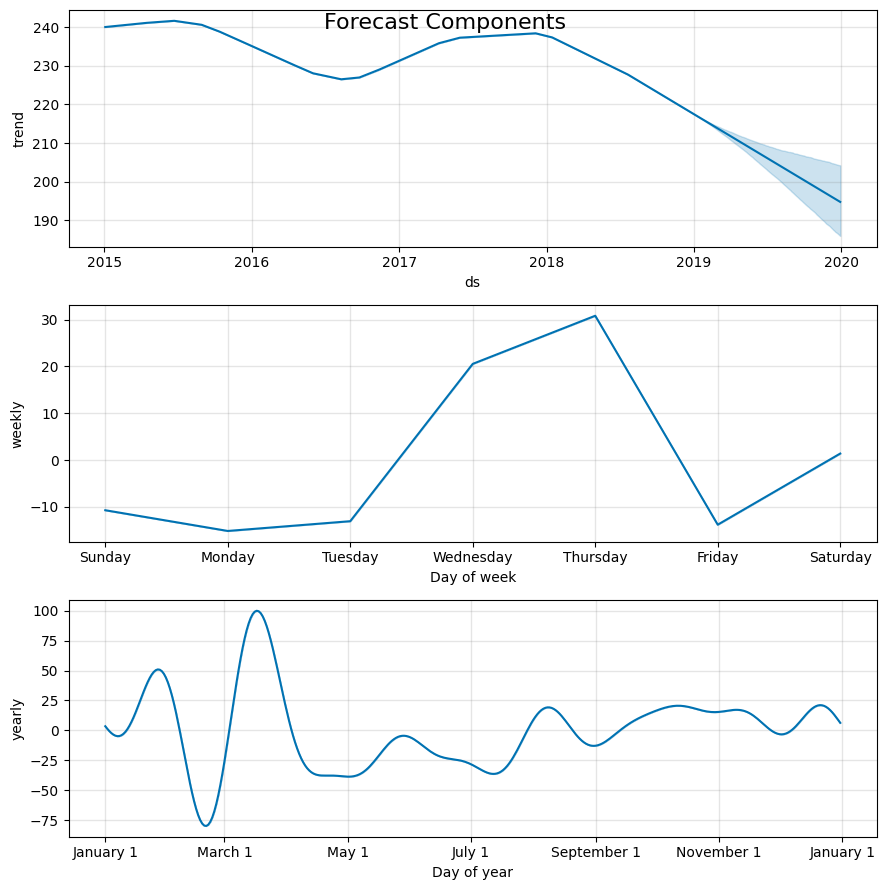

In [29]:
fig2 = model.plot_components(forecast)
plt.suptitle('Forecast Components', fontsize=16)
plt.show()


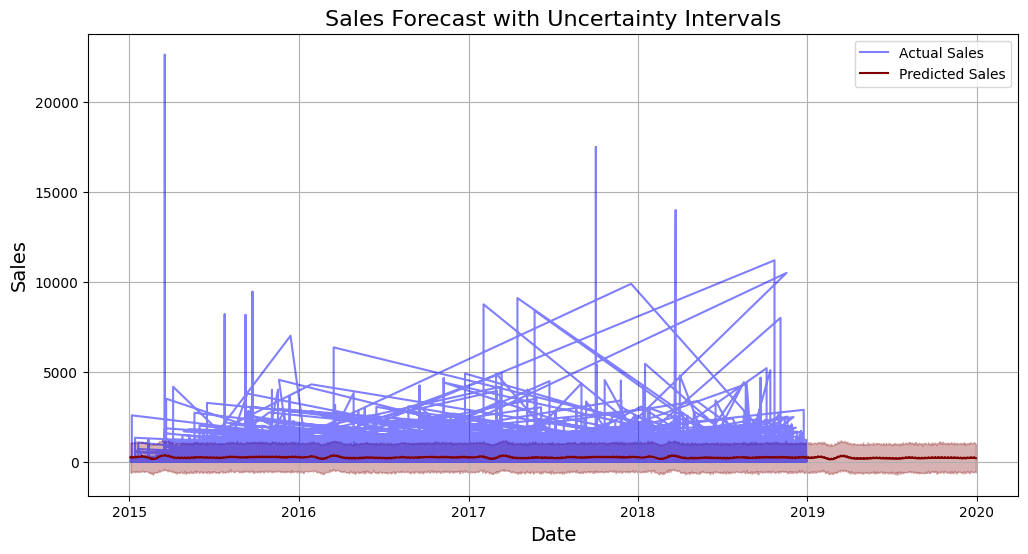

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Sales', color='blue', alpha=0.5)
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Sales', color='Maroon')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='Maroon', alpha=0.3)
plt.title('Sales Forecast with Uncertainty Intervals', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()
plt.grid()

plt.show()


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


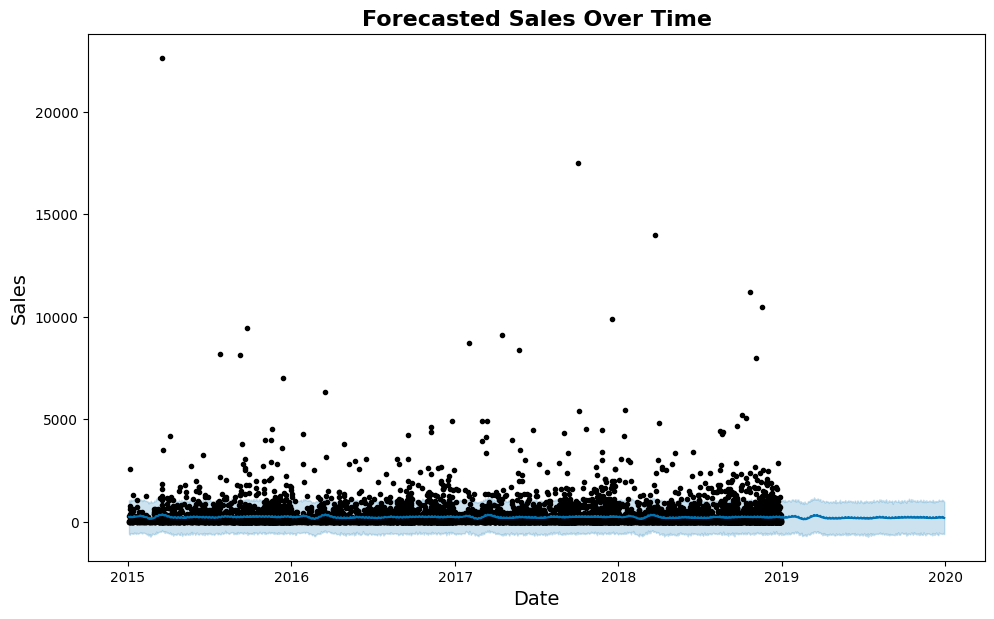

In [31]:
from prophet import Prophet
import matplotlib.pyplot as plt
fig = model.plot(forecast)
for line in fig.gca().get_lines():
    if 'yhat' in line.get_label():
        line.set_color('maroon')
    elif 'yhat_lower' in line.get_label() or 'yhat_upper' in line.get_label():
        line.set_color('navy')
plt.title('Forecasted Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid()

plt.show()
